In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq
import seaborn as sns
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import sklearn
from sklearn.decomposition import PCA
import itertools
import mdtraj as md


In [16]:
topology=f"../system/simulations_final/replica0/npt_output.gro"
trajectory=f"../system/simulations_final/replica0/production_run.part0002.xtc"
# outdir=r'C:\Users\dell\Projects\robustelli-md-exercises\Lab3_Ubq_MD\output'

# if not os.path.exists(outdir):
#     os.makedirs(outdir)
    
print("pdb:",topology)
print("trjaectory:",trajectory)

pdb: ../system/simulations_final/replica0/npt_output.gro
trjaectory: ../system/simulations_final/replica0/production_run.part0002.xtc


In [17]:
trj = md.load(trajectory, top=topology,stride=1)
trj = trj.atom_slice(range(627))
trj.center_coordinates()
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames=trj.n_frames

In [18]:
nres=[]



for res in trj.topology.residues: nres.append(res.resSeq)
sequence=(' %s' % [residue for residue in trj.topology.residues])
resname=(' %s' % [residue.name for residue in trj.topology.residues])
resindex=(' %s' % [residue.index for residue in trj.topology.residues])
res_num=(' %s' % [residue.resSeq  for residue in trj.topology.residues])



#log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue number: %s\n" % res_num)
print("residue index: %s\n" % resindex)




** SYSTEM INFO **

Number of atoms: 627

Number of residues: 42

Number of frames: 953

Starting frame: 0

Last frame: 953

sequence:  [ASP1, ALA2, GLU3, PHE4, ARG5, HISD6, ASP7, SER8, GLY9, TYR10, GLU11, VAL12, HISD13, HISD14, GLN15, LYS16, LEU17, VAL18, PHE19, PHE20, ALA21, GLU22, ASP23, VAL24, GLY25, SER26, ASN27, LYS28, GLY29, ALA30, ILE31, ILE32, GLY33, LEU34, MET35, VAL36, GLY37, GLY38, VAL39, VAL40, ILE41, ALA42]

residue names:  ['ASP', 'ALA', 'GLU', 'PHE', 'ARG', 'HISD', 'ASP', 'SER', 'GLY', 'TYR', 'GLU', 'VAL', 'HISD', 'HISD', 'GLN', 'LYS', 'LEU', 'VAL', 'PHE', 'PHE', 'ALA', 'GLU', 'ASP', 'VAL', 'GLY', 'SER', 'ASN', 'LYS', 'GLY', 'ALA', 'ILE', 'ILE', 'GLY', 'LEU', 'MET', 'VAL', 'GLY', 'GLY', 'VAL', 'VAL', 'ILE', 'ALA']

residue number:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]

residue index:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,

In [19]:
residue_num=[]
for res in top.residues: 
    residue_num.append(res.resSeq)
residue_id=np.asarray(residue_num)
residue_id

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42])

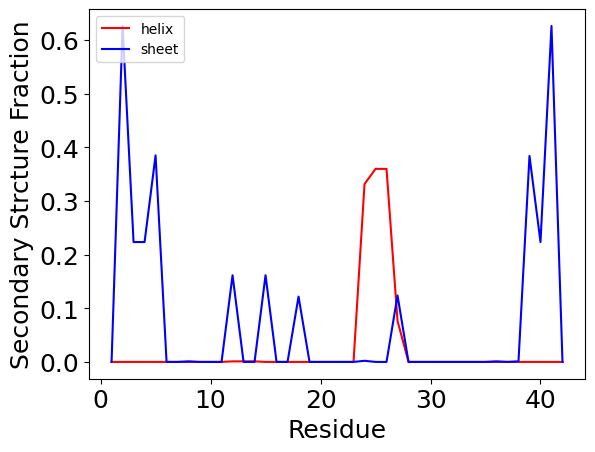

In [20]:
dssp=md.compute_dssp(trj,simplified=True)

def dssp_convert(dssp):
 dsspH=np.copy(dssp)
 dsspE=np.copy(dssp)
 dsspH[dsspH=='H']=1                                                                                      
 dsspH[dsspH=='E']=0                                                                                      
 dsspH[dsspH=='C']=0                                                                                      
 dsspH[dsspH=='NA']=0
 dsspH=dsspH.astype(int)
 TotalH=np.sum(dsspH,axis=1) 
 Hprop=np.sum(dsspH,axis=0).astype(float)/len(dsspE) 

 dsspE[dsspE=='H']=0
 dsspE[dsspE=='E']=1
 dsspE[dsspE=='C']=0
 dsspE[dsspE=='NA']=0
 dsspE=dsspE.astype(int)
 TotalE=np.sum(dsspE,axis=1) 
 Eprop=np.sum(dsspE,axis=0).astype(float)/len(dsspE) 
 return Hprop, Eprop

Hprop,Eprop=dssp_convert(dssp)
plt.plot(residue_num,Hprop,c='r',label='helix')
plt.plot(residue_num,Eprop,c='b',label='sheet')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)


SS: H []
SS: E []
SS: I []
SS: G []
SS: B []
SS: T [13 14]
SS: S [10 17 23]
SS:   [ 1 28 42]


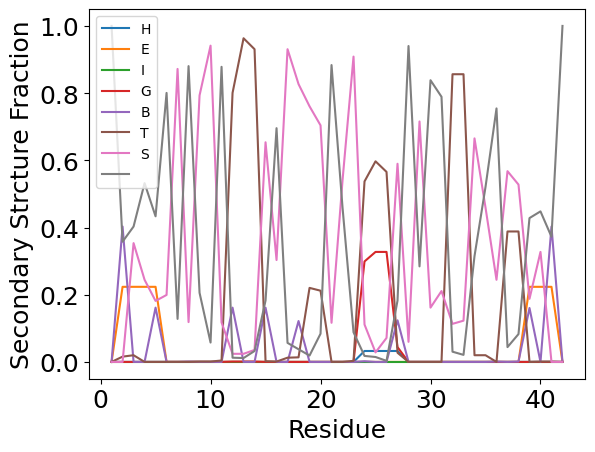

In [21]:
dssp_full=md.compute_dssp(trj,simplified=False)

def dssp_convert_type(dssp,type):
 dsspS=np.copy(dssp)
 dsspS[dsspS!=type]=0                                                                                      
 dsspS[dsspS==type]=1                                                                                      
 dsspS=dsspS.astype(int)
 TotalS=np.sum(dsspS,axis=1) 
 Sprop=np.sum(dsspS,axis=0).astype(float)/len(dsspS) 
 return Sprop

for t in ['H','E','I','G','B','T','S',' ']:
  Tprop=dssp_convert_type(dssp_full,t)
  plt.plot(residue_num,Tprop,label=t)
  print("SS:",t,np.asarray(residue_num)[np.where(Tprop>.90)])

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)


In [22]:
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

In [23]:
phi_dict={}
dihedral_dict = { 'phi': { },
          'psi': { },
          'chi1': { },
          'chi2': { }}

for i in range(0,len(indices_phi)):
  indices=indices_phi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['phi'][resnum]=phis[:,i]

for i in range(0,len(indices_psi)):
  indices=indices_psi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['psi'][resnum]=psis[:,i]

for i in range(0,len(indices_chi1)):
  indices=indices_chi1[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi1'][resnum]=chi1s[:,i]

for i in range(0,len(indices_chi2)):
  indices=indices_chi2[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi2'][resnum]=chi2s[:,i]
    


In [24]:
#Heres a function to plot a phi/psi ramachandran plot:

def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.show()
 return

def plot_chi(res):
    if res in dihedral_dict['chi1']:
     plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('counts', size=18)
     plt.tick_params(labelsize=18)
     plt.show()
     plt.clf()   
    if res in dihedral_dict['chi2']:
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
    return




In [25]:
# for i in range(2, 42):
#     plot_phipsi(i)
#     plt.clf()
#     plot_chi(i)
#     plt.clf()

In [26]:
def plot_phipsi_FES(res):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],36,[[-3.14,3.14],[-3.14,3.14]],normed=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300                                                                                                  
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()                                                                                                 
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return



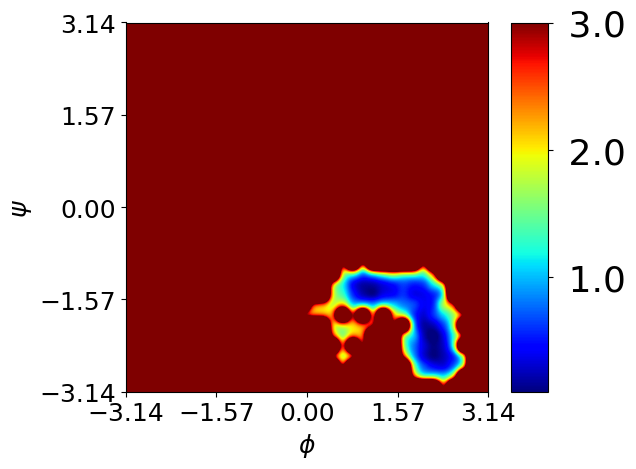

In [27]:
plot_phipsi_FES(2)

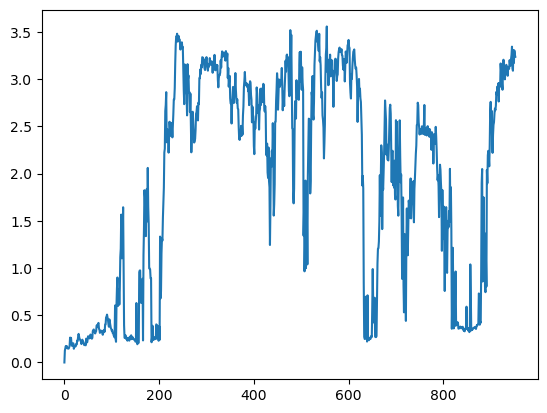

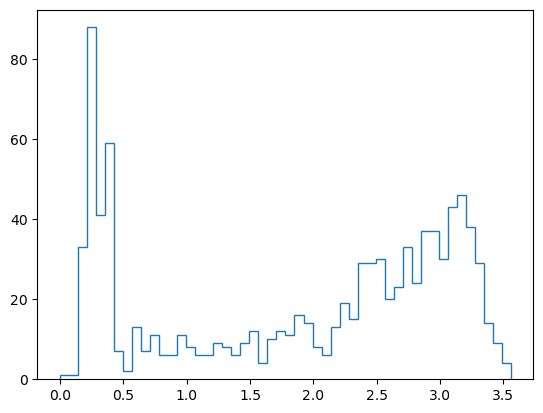

In [28]:
rmsd = md.rmsd(trj, trj, 0)
plt.plot(rmsd)
plt.show()
plt.clf()

plt.hist(rmsd,histtype='step',bins=50)
plt.show()

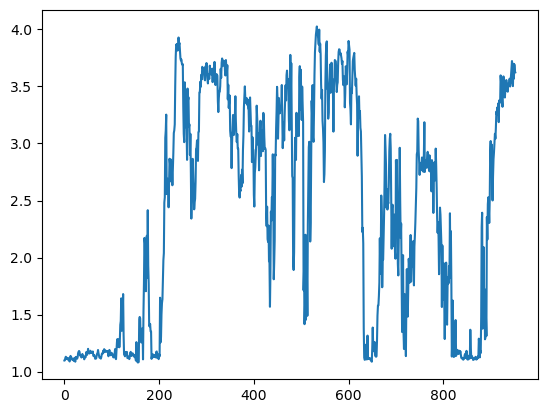

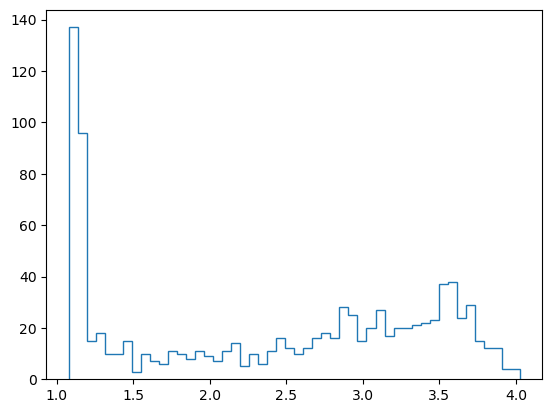

In [29]:
rg=md.compute_rg(trj, masses=None)
plt.plot(rg)
plt.show()
plt.clf()

plt.hist(rg,histtype='step',bins=50)
plt.show()

In [30]:
hbonds = md.baker_hubbard(trj, periodic=False)
label = lambda hbond : '%s -- %s' % (trj.topology.atom(hbond[0]), trj.topology.atom(hbond[2]))
for hbond in hbonds:
    print(label(hbond))

ASP1-N -- GLU3-OE1
ASP1-N -- ALA42-O
ASP1-N -- ALA42-OXT
ASP1-N -- ALA42-O
ASP1-N -- ALA42-OXT
ASP1-N -- ALA42-O
ASP1-N -- ALA42-OXT
ALA2-N -- ASP1-OD1
ALA2-N -- ASP1-OD2
GLU3-N -- ASP1-O
GLU3-N -- VAL40-O
PHE4-N -- VAL40-O
ARG5-N -- VAL39-O
ARG5-NE -- ASP7-O
ARG5-NH2 -- ASP7-O
GLY9-N -- MET35-O
TYR10-N -- SER8-OG
GLU11-N -- GLN15-OE1
VAL12-N -- TYR10-O
GLN15-N -- GLU11-O
LYS16-NZ -- GLU22-OE1
LYS16-NZ -- GLU22-OE2
LYS16-NZ -- GLU22-OE2
LEU17-N -- GLN15-O
VAL18-N -- SER26-OG
VAL18-N -- SER26-O
PHE19-N -- LEU17-O
ALA21-N -- ASN27-OD1
SER26-N -- ASP23-O
ASN27-N -- ASP23-O
ASN27-N -- VAL24-O
ASN27-ND2 -- ALA21-O
ASN27-ND2 -- ASP23-O
LYS28-N -- VAL18-O
LYS28-N -- SER26-O
LEU34-N -- ILE31-O
MET35-N -- TYR10-OH
VAL36-N -- LEU34-O
GLY38-N -- ARG5-O
ALA42-N -- ASP1-O
SER26-OG -- LYS16-O


In [31]:
for hbond in hbonds:
 donor = top.atom(hbond[0])
 acc = top.atom(hbond[2])
 print(hbond,donor,acc)

[ 0  1 35] ASP1-N GLU3-OE1
[  0   1 625] ASP1-N ALA42-O
[  0   1 626] ASP1-N ALA42-OXT
[  0   2 625] ASP1-N ALA42-O
[  0   2 626] ASP1-N ALA42-OXT
[  0   3 625] ASP1-N ALA42-O
[  0   3 626] ASP1-N ALA42-OXT
[14 15 10] ALA2-N ASP1-OD1
[14 15 11] ALA2-N ASP1-OD2
[24 25 13] GLU3-N ASP1-O
[ 24  25 596] GLU3-N VAL40-O
[ 39  40 596] PHE4-N VAL40-O
[ 59  60 580] ARG5-N VAL39-O
[ 72  73 111] ARG5-NE ASP7-O
[ 78  79 111] ARG5-NH2 ASP7-O
[123 124 534] GLY9-N MET35-O
[130 131 119] TYR10-N SER8-OG
[151 152 227] GLU11-N GLN15-OE1
[166 167 150] VAL12-N TYR10-O
[216 217 165] GLN15-N GLU11-O
[249 250 351] LYS16-NZ GLU22-OE1
[249 250 352] LYS16-NZ GLU22-OE2
[249 251 352] LYS16-NZ GLU22-OE2
[255 256 232] LEU17-N GLN15-O
[274 275 397] VAL18-N SER26-OG
[274 275 400] VAL18-N SER26-O
[290 291 273] PHE19-N LEU17-O
[330 331 409] ALA21-N ASN27-OD1
[390 391 366] SER26-N ASP23-O
[401 402 366] ASN27-N ASP23-O
[401 402 382] ASN27-N VAL24-O
[410 411 339] ASN27-ND2 ALA21-O
[410 412 366] ASN27-ND2 ASP23-O
[415 416 28

No handles with labels found to put in legend.


Text(0.5, 0, 'Donor-acceptor distance [nm]')

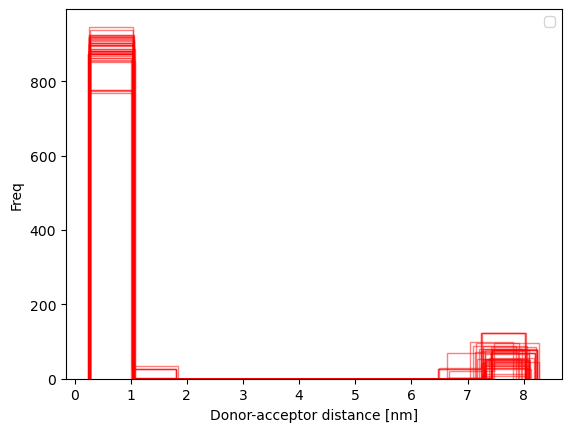

In [43]:
da_distances = md.compute_distances(trj, hbonds[:, [0,2]], periodic=False)
# print(len(da_distances[0]))
# color = itertools.cycle(['r', 'b', 'gold'])
# label=label(hbonds[i]),
for i in range(41):
    plt.hist(da_distances[:, i], color='r',histtype='step',bins=10,  alpha=0.5)
plt.legend()
plt.ylabel('Freq');
plt.xlabel('Donor-acceptor distance [nm]')

In [47]:
contact_maps = []
contact_distances = []
for i in range(1, 42):
    contact_map = []
    contact_distance = []
    for j in range(1, 42):
        if i == j:
            contacts = 0
        else:
            dist = md.compute_contacts(trj, [[i, j]])
            array = np.asarray(dist[0]).astype(float)
            distance = np.average(array)
            contact_distance.append(distance)
            contact = np.where(array < 0.5, 1, 0)
            contacts = np.average(contact)
        contact_map.append(contacts)
    contact_maps.append(contact_map)
    contact_distances.append(contact_distance)
final_map = np.asarray(contact_maps).astype(float)
final_distance = np.asarray(contact_distances).astype(float)

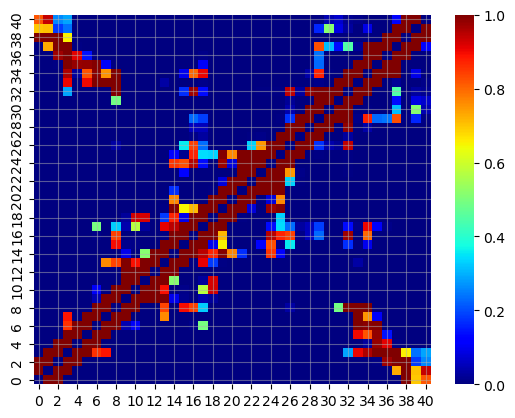

In [48]:
ax = sns.heatmap(final_map, vmin=0.0, vmax=1.0,cmap='jet')
ax.invert_yaxis()
ax.grid(which='both', alpha=0.5)

In [2]:
todo:
    radius of gyration
    average inter residue contacts
    relative hydrophobic surface area
    average solvent accessible surface areas per residue
    the average number of hydrogen bonds formed by water molecules within the hydration shell
    number of water molecules in the hydration shell
    changes in conformational entropy have been estimated from probability distributions of structural parameters, such as the radius of gyration
    we applied this approach to the residue-specific Ramachandran plots
    analyzed Lennard-Jones and Coulomb contributions between 10074-G5 and each residue.
    

SyntaxError: invalid syntax (1131135946.py, line 1)